TIPS DATASET


This note book contains the analysis and descriptions/plots for the Tip Dataset

https://github.com/mwaskom/seaborn-data/blob/master/tips.csv


In [1]:
# The numpay package
import numpy as np
# The pandas package 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

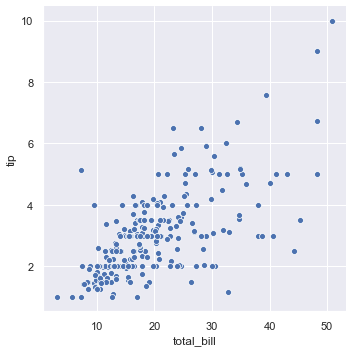

In [2]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

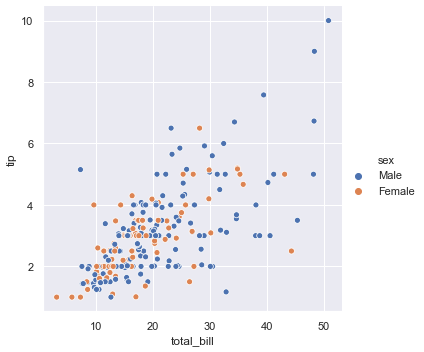

In [3]:
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips);

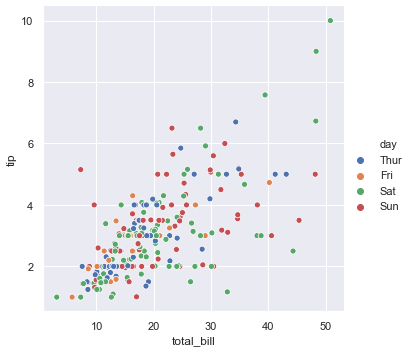

In [4]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips);

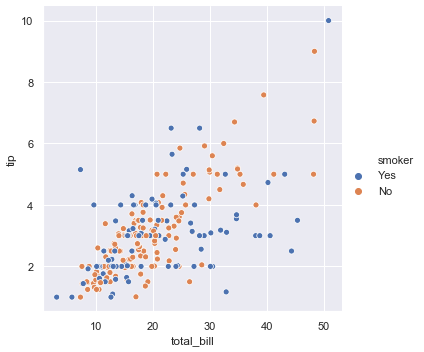

In [5]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

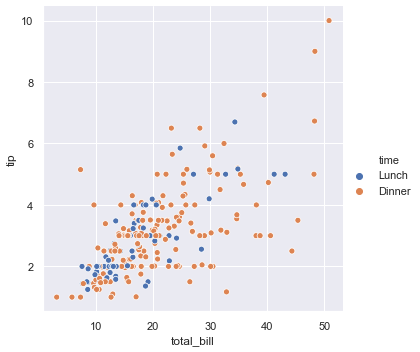

In [6]:
sns.relplot(x="total_bill", y="tip", hue="time", data=tips);

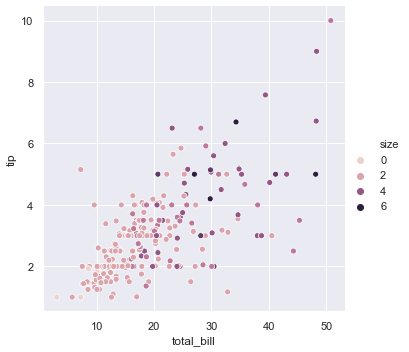

In [7]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

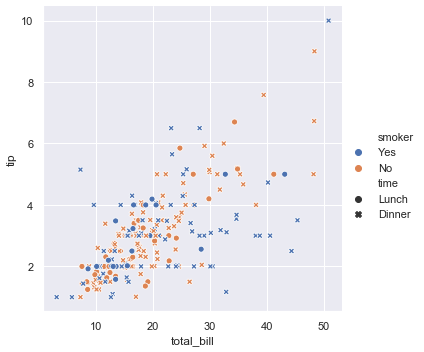

In [8]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

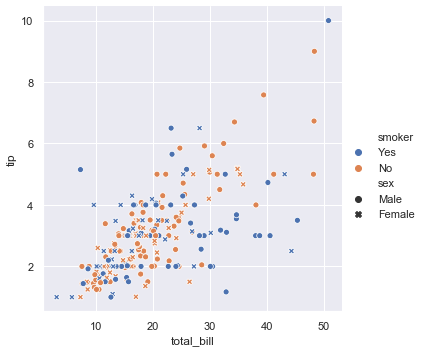

In [9]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="sex", data=tips);

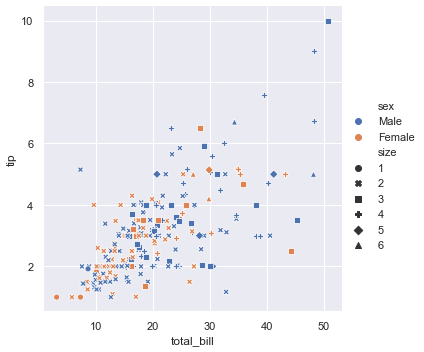

In [10]:
sns.relplot(x="total_bill", y="tip", hue="sex", style="size", data=tips);

# CONCLUSION
